### Synthetic data included:
- **allergies**
- careplans
- **conditions**
- **devices**
- **encounters**
- imaging_studies
- **immunizations**
- **medications**
- **observations**
- organizations
- **patients**
- payer_transitions
- payers
- **procedures**
- providers
- supplies



**NOTE: data is selected in relation to N3C similarity and current pipeline development**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load data selected

## Patients (Person)

In [2]:
#Load data
df_patients = pd.read_csv('../../synthea-sample-data/data/10k_synthea_covid19_csv/patients.csv')
personCol = ['Id', 'BIRTHDATE', 'DEATHDATE', 'RACE', 'ETHNICITY','GENDER', 'STATE']
df_patients = df_patients[personCol]

In [3]:
df_patients.isnull().sum()

Id               0
BIRTHDATE        0
DEATHDATE    10000
RACE             0
ETHNICITY        0
GENDER           0
STATE            0
dtype: int64

In [4]:
df = df_patients.convert_dtypes()

In [5]:
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE']).dt.year
df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE']).dt.year
df[['DEATHDATE']] = df[['DEATHDATE']].fillna(0)

In [6]:
df['AGE'] = np.where(df['DEATHDATE'] != 0  , 0, (2021 - df['BIRTHDATE']))

### Deceased subset

In [7]:
df_dead = df.loc[(df['AGE'] == 0)]
df = df.loc[(df['AGE'] != 0)]

In [8]:
df_dead['AGE'] = (df_dead['DEATHDATE'] - df_dead['BIRTHDATE'])
df_dead

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,STATE,AGE
11,58cac9ec-4baa-46c1-b919-0ed13572b51d,1970,2016.0,white,hispanic,F,Massachusetts,46.0
42,c70992c9-ff13-467b-9032-1901506edeef,1959,2020.0,white,nonhispanic,M,Massachusetts,61.0
62,cd7cdbef-ef08-48da-9302-19bf4b2dffa3,1940,2010.0,white,nonhispanic,F,Massachusetts,70.0
72,a5c39700-6bf3-4984-af46-31344695e21b,1940,2020.0,white,nonhispanic,M,Massachusetts,80.0
80,419c213d-8d35-440c-bf47-a536f95df517,1964,1999.0,white,nonhispanic,M,Massachusetts,35.0
...,...,...,...,...,...,...,...,...
12318,59cd3afd-ba9c-4753-95b3-70c761cbd454,1937,2015.0,white,nonhispanic,F,Massachusetts,78.0
12330,cc08ece6-5a10-454f-b1d8-830a4b02fd31,1957,2020.0,white,nonhispanic,M,Massachusetts,63.0
12334,7475a593-3fa7-40c2-bbdf-86c68ebce67b,1918,2014.0,white,nonhispanic,F,Massachusetts,96.0
12348,3daf2b90-c439-469f-bb44-fb6109c6a8a7,1918,1999.0,white,nonhispanic,F,Massachusetts,81.0


## Patient Demographics Visualization

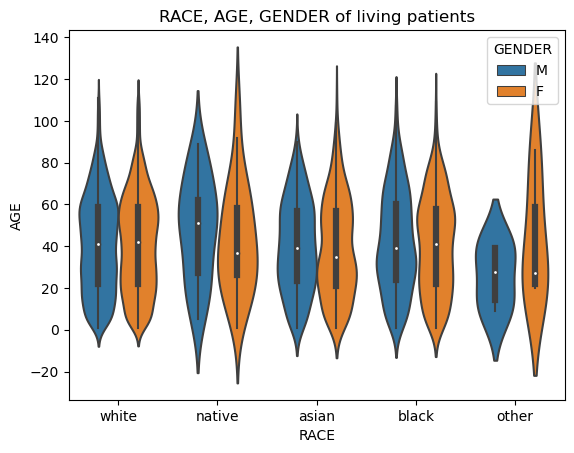

In [9]:
sns.violinplot(x = "RACE", y = "AGE", hue = 'GENDER', data = df)
plt.title('RACE, AGE, GENDER of living patients')
plt.show()

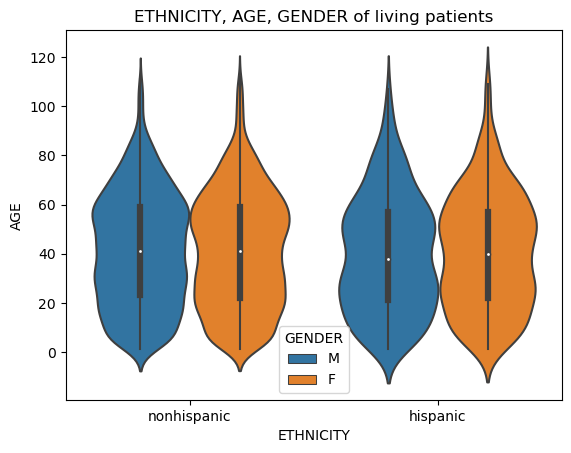

In [10]:
sns.violinplot(x = "ETHNICITY", y = "AGE", hue = 'GENDER', data = df)
plt.title('ETHNICITY, AGE, GENDER of living patients')
plt.show()

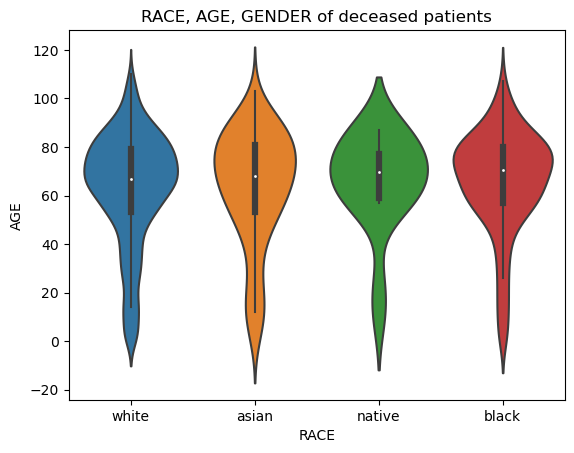

In [11]:
sns.violinplot(x = "RACE", y = "AGE",pallete = 'rainbow', data = df_dead)
plt.title('RACE, AGE, GENDER of deceased patients')
plt.show()

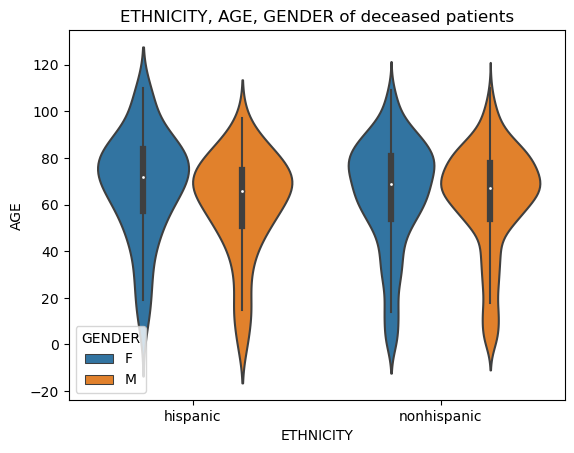

In [12]:
sns.violinplot(x = "ETHNICITY", y = "AGE", hue = 'GENDER', data = df_dead)
plt.title('ETHNICITY, AGE, GENDER of deceased patients')
plt.show()

## Immunizations
**Is not included in N3C, but from our prior work immunizations was a feature selected from the drugs dataset**

## Allergies
**Is not included in N3C, looking into it here to see if theres anything interesting that could be included in N3C**


## Devices
**Is not included in N3C, looking into it here to see if theres anything interesting that could be included in N3C**